In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("dataset.csv",low_memory=False)

print(data.shape)

(4424, 35)


In [20]:
# Check if the target column exists
target_column = "Target"  # Replace with the actual target column name
if target_column in data.columns:
    print(f"The target column '{target_column}' exists in the dataset.")
else:
    print(f"The target column '{target_column}' does NOT exist in the dataset.")

The target column 'Target' exists in the dataset.


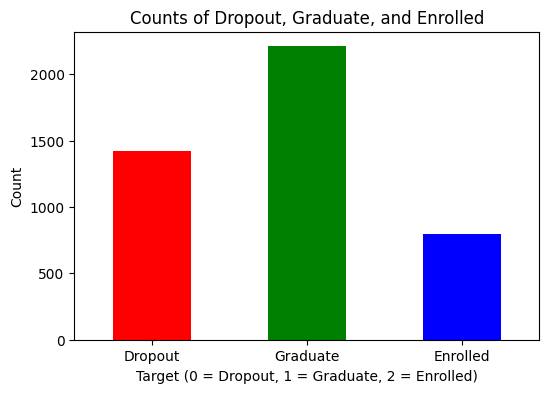

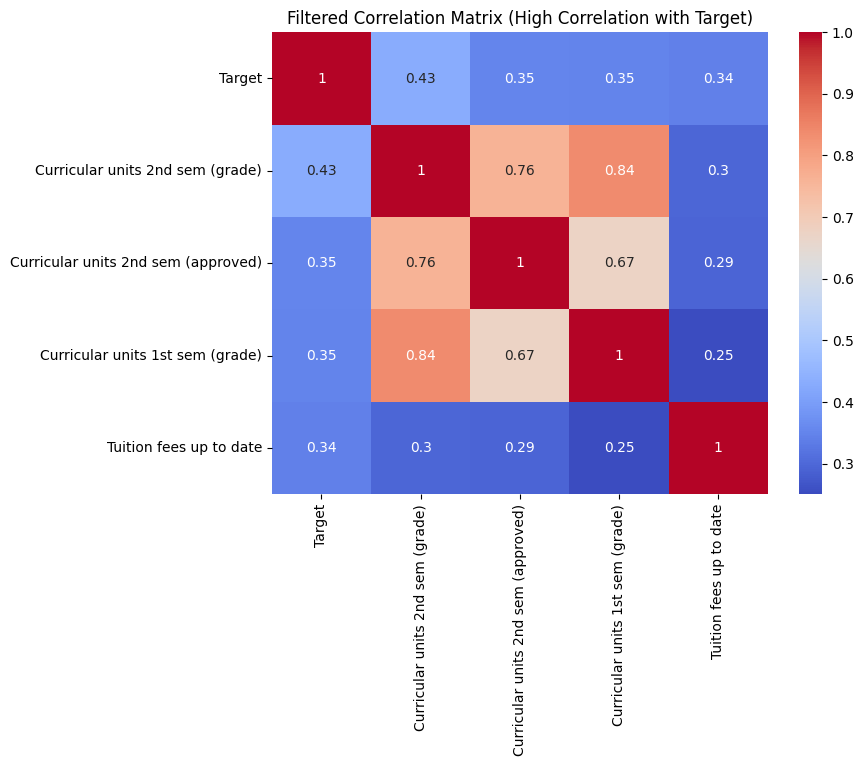

In [ ]:

# Encode the Target column to numerical values
target_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
if 'Target' in data.columns:
    data['Target'] = data['Target'].map(target_mapping)
else:
    raise ValueError("The 'Target' column is missing from the dataset.")

# Add a bar graph for Dropout, Graduate, and Enrolled
if not data['Target'].isnull().all():
    plt.figure(figsize=(6, 4))
    data['Target'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])
    plt.title('Counts of Dropout, Graduate, and Enrolled')
    plt.xlabel('Target (0 = Dropout, 1 = Graduate, 2 = Enrolled)')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Graduate', 'Enrolled'], rotation=0)
    plt.show()
else:
    print("The Target column is empty or contains only NaN values.")

# Ensure numeric_data is defined by selecting only numeric columns from the dataset
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlations with the Target column
if 'Target' in numeric_data.columns:
    correlations_with_target = numeric_data.corr()['Target'].sort_values(ascending=False)

    # Visualize the filtered correlation matrix
    if len(high_correlation_columns) > 1:  # Ensure there are enough columns to create a matrix
        plt.figure(figsize=(8, 6))
        filtered_correlation_matrix = numeric_data[high_correlation_columns].corr()
        sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Filtered Correlation Matrix (High Correlation with Target)')
        plt.show()
    else:
        print("Not enough highly correlated columns to create a correlation matrix.")
else:
    print("The 'Target' column is missing from numeric_data.")

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_dropout[top_correlated_features], y=top_correlated_features, palette='viridis')


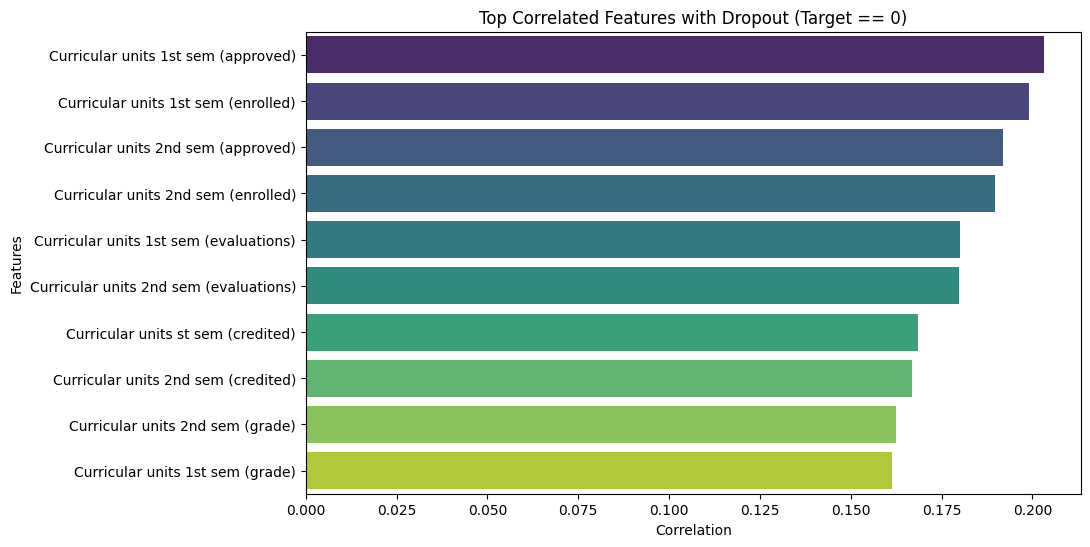


Boxplots for Top Correlated Features:


/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


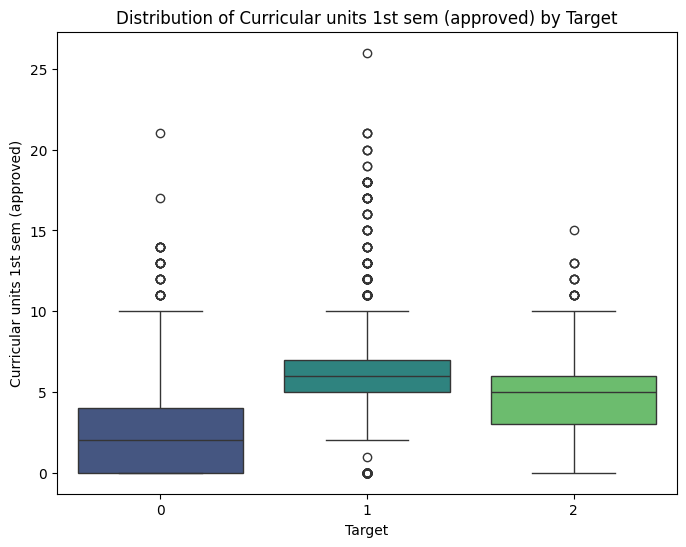

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


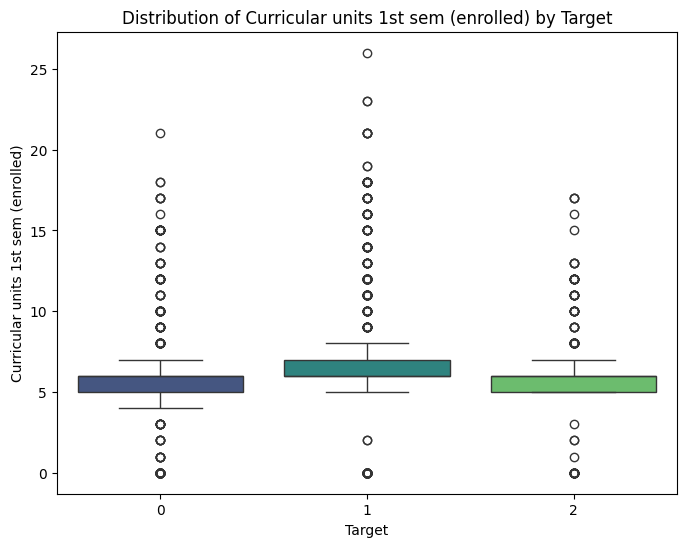

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


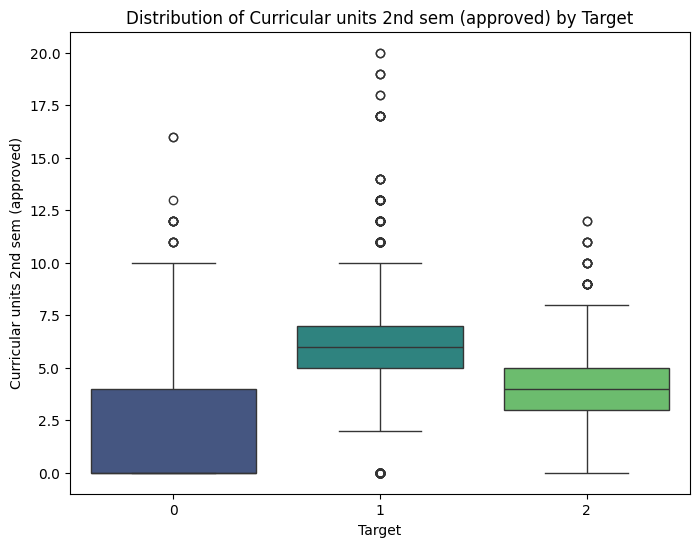

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


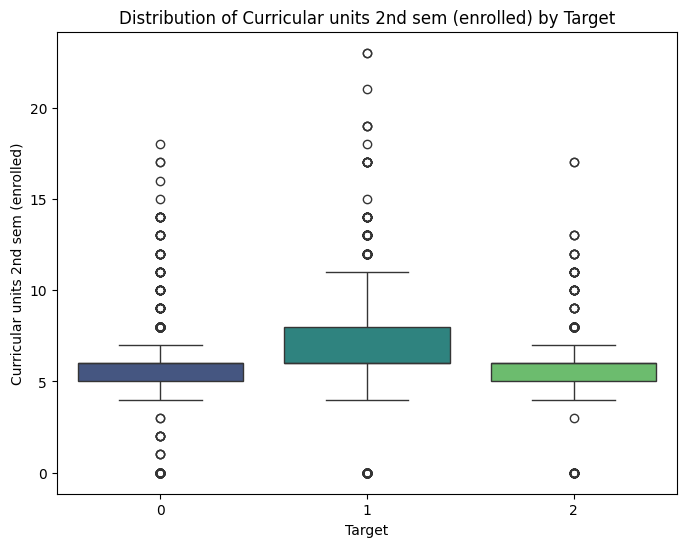

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


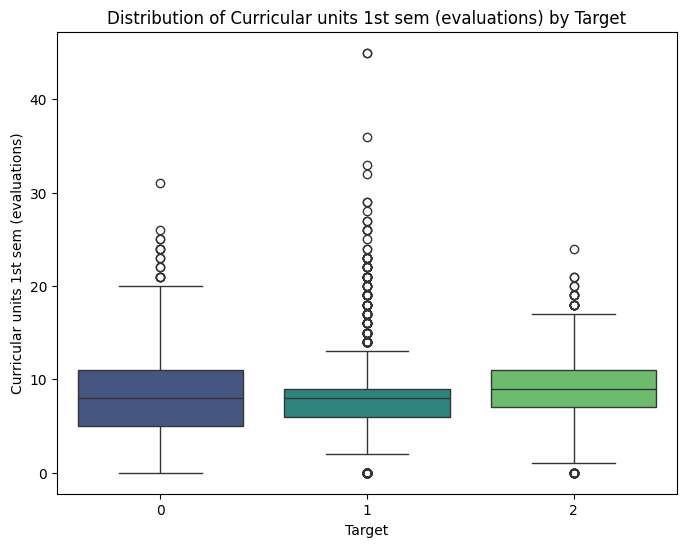

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


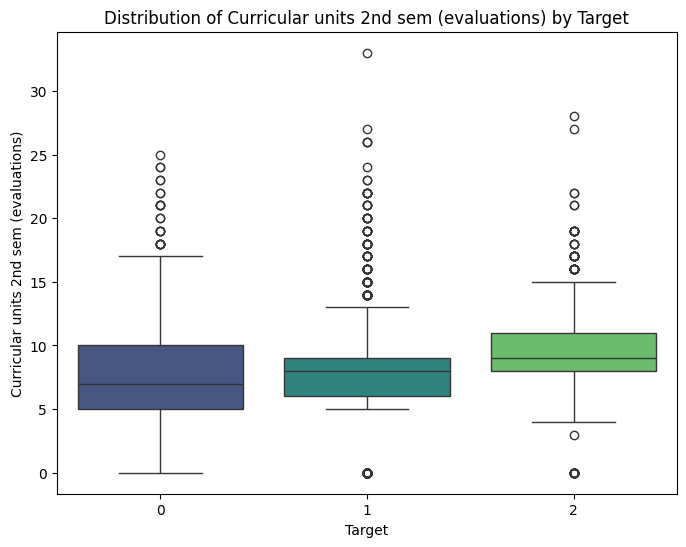

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


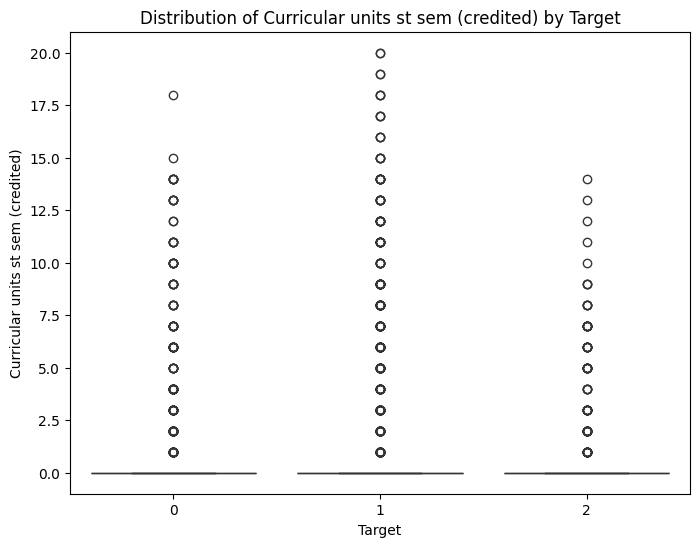

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


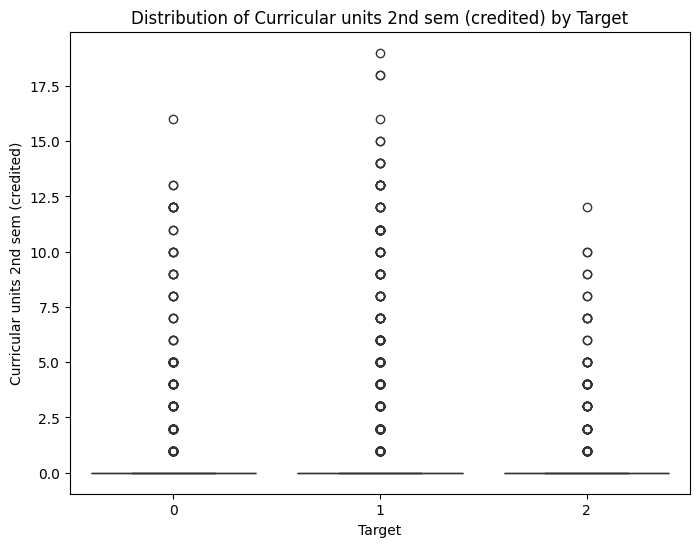

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


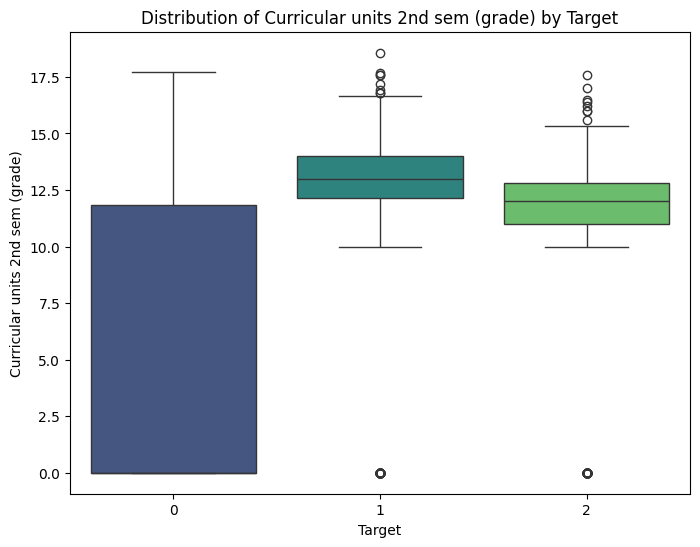

/var/folders/q0/djdb7_k941z5tq5b1xsd0xhc0000gn/T/ipykernel_2119/667784458.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=feature, data=data, palette='viridis')


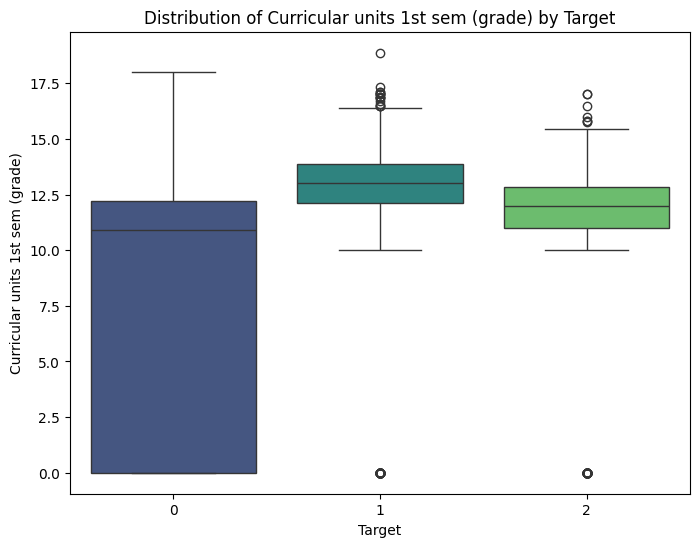

In [4]:

# Filter the dataset for Dropout (Target == 0)
dropout_data = data[data['Target'] == 0]

# Calculate correlations for Dropout subset
dropout_numeric_data = dropout_data.select_dtypes(include=['number'])  # Select only numeric columns
correlations_with_dropout = dropout_numeric_data.corr().mean().sort_values(ascending=False)

# Visualize the top correlated features with Dropout
top_correlated_features = correlations_with_dropout.head(10).index  # Top 10 correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_dropout[top_correlated_features], y=top_correlated_features, palette='viridis')
plt.title('Top Correlated Features with Dropout (Target == 0)')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

# 1. Boxplots for Feature Distributions by Target
print("\nBoxplots for Top Correlated Features:")
for feature in top_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()

# 2. Feature Importance Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for Random Forest
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


/Users/kudakwashemutizhe/Documents/students-dropout-prediction/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Training CNN with kernel size 3...
Epoch 1/100


/Users/kudakwashemutizhe/Documents/students-dropout-prediction/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5988 - loss: 1.2024 - val_accuracy: 0.5438 - val_loss: 0.9337
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7146 - loss: 0.8919 - val_accuracy: 0.5593 - val_loss: 0.9049
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7234 - loss: 0.8099 - val_accuracy: 0.7359 - val_loss: 0.7089
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7235 - loss: 0.8308 - val_accuracy: 0.7712 - val_loss: 0.5954
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7286 - loss: 0.7657 - val_accuracy: 0.7684 - val_loss: 0.5696
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7423 - loss: 0.7045 - val_accuracy: 0.7797 - val_loss: 0.5589
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7544 - loss: 0.7036 - val_accuracy: 0.7797 - val_loss: 0.5567
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7416 - loss: 0.7436 - val_accuracy: 0.7811 - val_loss: 0.6

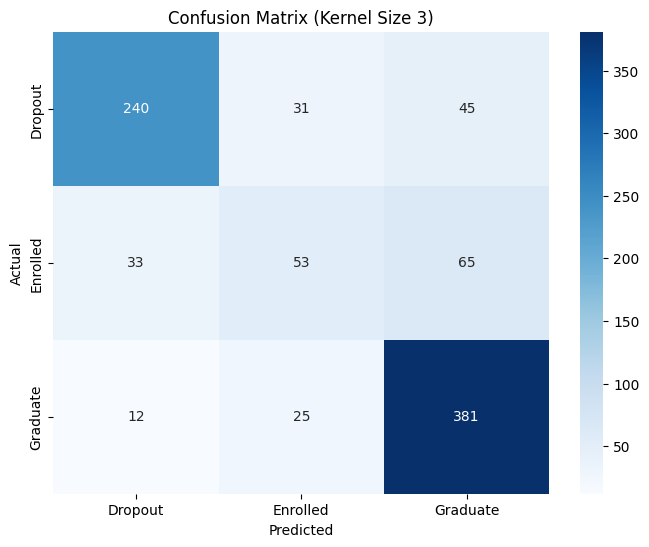


Training CNN with kernel size 5...
Epoch 1/100


/Users/kudakwashemutizhe/Documents/students-dropout-prediction/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5463 - loss: 1.4064 - val_accuracy: 0.2401 - val_loss: 1.0427
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6986 - loss: 0.9055 - val_accuracy: 0.5339 - val_loss: 0.9201
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.8808 - val_accuracy: 0.6427 - val_loss: 0.8228
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7146 - loss: 0.8226 - val_accuracy: 0.7246 - val_loss: 0.6756
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7439 - loss: 0.7842 - val_accuracy: 0.7076 - val_loss: 0.6606
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7232 - loss: 0.7935 - val_accuracy: 0.7302 - val_loss: 0.6589
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7327 - loss: 0.7261 - val_accuracy: 0.7684 - val_loss: 0.6116
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7427 - loss: 0.7074 - val_accuracy: 0.7839 - val_loss: 0.5

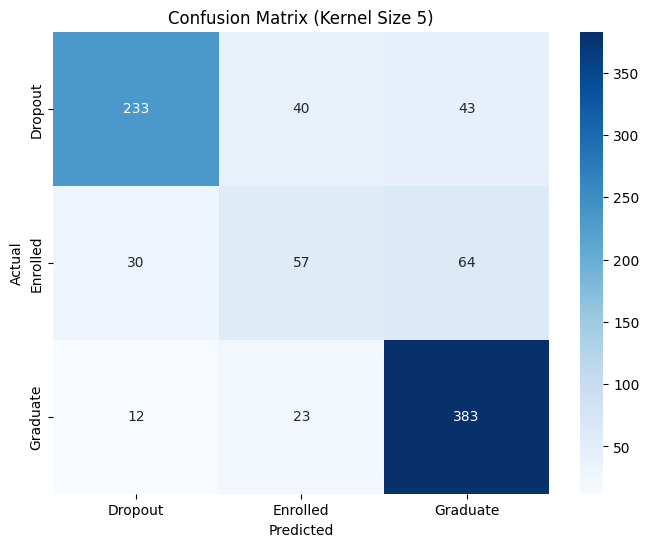


Training CNN with kernel size 7...
Epoch 1/100


/Users/kudakwashemutizhe/Documents/students-dropout-prediction/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5681 - loss: 1.2778 - val_accuracy: 0.5466 - val_loss: 0.9551
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7009 - loss: 0.8850 - val_accuracy: 0.6681 - val_loss: 0.8284
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7066 - loss: 0.8722 - val_accuracy: 0.4590 - val_loss: 0.8980
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7166 - loss: 0.8775 - val_accuracy: 0.7359 - val_loss: 0.6503
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7358 - loss: 0.7872 - val_accuracy: 0.7472 - val_loss: 0.6219
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7430 - loss: 0.7254 - val_accuracy: 0.7556 - val_loss: 0.5814
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7333 - loss: 0.7604 - val_accuracy: 0.7684 - val_loss: 0.5914
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7566 - loss: 0.7056 - val_accuracy: 0.7599 - val_loss: 0.6

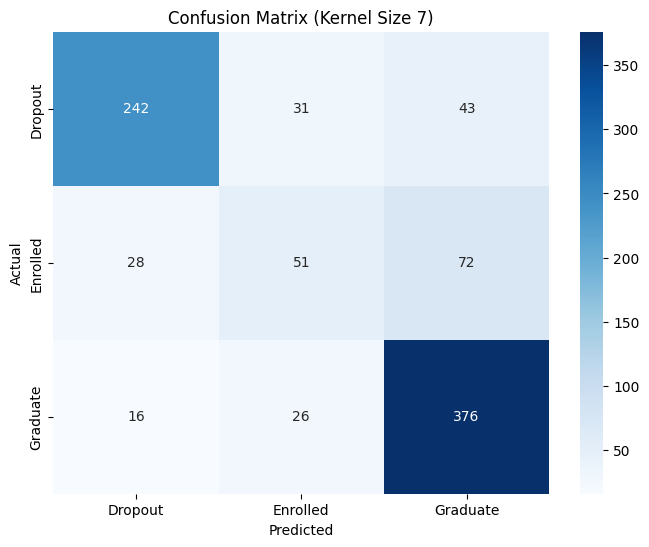


Comparison of Results:
Kernel Size 3: Accuracy = 0.7853, Precision = 0.7501, Recall = 0.7616, F1-Score = 0.7507
Kernel Size 5: Accuracy = 0.7740, Precision = 0.7528, Recall = 0.7605, F1-Score = 0.7518
Kernel Size 7: Accuracy = 0.7811, Precision = 0.7444, Recall = 0.7559, F1-Score = 0.7450


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("dataset.csv")

# Separate features and target
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target

# Ensure all features are numeric
X = pd.get_dummies(X, drop_first=True)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for CNN input (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Function to build an improved CNN model
def build_cnn(kernel_size):
    model = Sequential([
        Conv1D(64, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),
        Dropout(0.3),
        Conv1D(128, kernel_size=kernel_size, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Experiment with fixed and varying kernel sizes
kernel_sizes = [3, 5, 7]  # Example kernel sizes
results = {}

for kernel_size in kernel_sizes:
    print(f"\nTraining CNN with kernel size {kernel_size}...")
    model = build_cnn(kernel_size)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Calculate metrics
    print(f"\nClassification Report for kernel size {kernel_size}:")
    report = classification_report(y_test_classes, y_pred_classes, output_dict=True)
    print(classification_report(y_test_classes, y_pred_classes))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f'Confusion Matrix (Kernel Size {kernel_size})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Store results
    results[kernel_size] = {
        'accuracy': history.history['val_accuracy'][-1],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }

# Compare results across kernel sizes
print("\nComparison of Results:")
for kernel_size, metrics in results.items():
    print(f"Kernel Size {kernel_size}: Accuracy = {metrics['accuracy']:.4f}, Precision = {metrics['precision']:.4f}, Recall = {metrics['recall']:.4f}, F1-Score = {metrics['f1_score']:.4f}")